In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import pandas as pd
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    #confusion_matrix=[]

    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=3,shuffle=True)
    for train,test in kf:
        rf.fit(x.ix[train],y[train])
        prediction=rf.predict(x.ix[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        #confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors)#,confusion_matrix

In [3]:
def layer_rbf(x,y):
    """version 2"""
    gamma=random.uniform(0.1, 10)
    kpca=KernelPCA(kernel='rbf',gamma=gamma,n_components=x.shape[1])
    x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
    xT=pd.concat((x,x_kpca),axis=1)## create 2*N features
    xT.columns=range(xT.shape[1])
    print "xT shape conbined",xT.shape
    rf=RFC(n_estimators=100,max_features=None)
    rf.fit(xT,y)
    
    rank=[i for i in rf.feature_importances_]
    #print "rank",len(rank),"rank",rank
    selection=[rank.index(i) for i in sorted(rank)]
    drop=selection[1:x.shape[1]+1]
    print "drop",len(drop),"drop:",drop
    print xT.columns
    xT.drop(drop , axis=1 , inplace=True)
    print "xT after drop",xT.shape
    totalCrossErrors=crossValidation_forest(xT,y)
    print xT.columns
    print "------------"
    return xT, totalCrossErrors

In [4]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [5]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# x=pd.DataFrame(iris.data)
# y=iris.target


In [24]:
path=r"C:\Users\zc\Documents\MNIST data\train.csv"
mnist=pd.read_csv(path,sep=",")
#print mnist.columns
y=mnist['label']
print mnist.shape
x=mnist.drop('label',axis=1)
print type(y)
print type(x)
y=np.array(y, dtype=pd.Series)
print type(y)

(42000, 785)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [25]:
sample=random.sample(range(x.shape[0]),1000)
#print sample
x=x.loc[sample]
y=y[sample]
print x.shape
print y.shape

(1000, 784)
(1000L,)


In [26]:
pca = PCA(n_components=x.shape[1])
pca.fit(x)
print(sum(pca.explained_variance_ratio_))

1.0


In [27]:
explainedRatio=[]
explained=0
for i in pca.explained_variance_ratio_:
    explained+=i
    explainedRatio.append(explained)

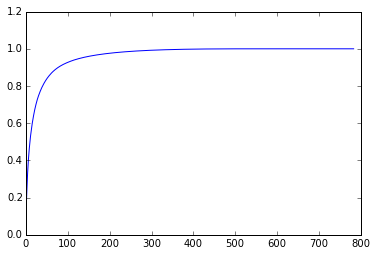

In [28]:
index=range(len(explainedRatio))
from matplotlib import pyplot as plt
plt.plot(index,explainedRatio)
plt.show()

In [29]:
for i in range(len(explainedRatio)):
    if explainedRatio[i]>0.95:
        break
print i

132


In [30]:
pca = PCA(n_components=i)
x_c=pd.DataFrame(pca.fit_transform(x))

In [31]:
resultlist,errorlist=[],[]

for i in range(30):
    print "layer:", i
    print x_c.shape
    result,error=layer_rbf(x_c,y)
    x_c=result
    resultlist.append(result)
    errorlist.append(error)

layer: 0
(1000, 132)
xT shape conbined (1000, 264)
rank 264 rank [0.12485455122128529, 0.10203551019409782, 0.0087996453776857751, 0.091382935502327831, 0.10612863625363181, 0.087411288792279523, 0.032960442323302315, 0.015419074979101537, 0.024698946761044796, 0.010899041536920069, 0.0086442530014035537, 0.0029073238560365978, 0.016816677566055448, 0.020042591726547824, 0.0091515383758745232, 0.0039088572892774683, 0.0082609884213481512, 0.003617994348476396, 0.0063867621873287964, 0.0039228677829552241, 0.0022297078815709187, 0.0072999416324360166, 0.0045492413175596226, 0.0029201129743170319, 0.0026977738846223733, 0.0042351085066736479, 0.010388675729434938, 0.0016420107768111943, 0.0033316833720469273, 0.0017457301736050143, 0.0037007494463835162, 0.0019826320233394031, 0.0027344852881028931, 0.0033867738317968315, 0.0013150151390541106, 0.0028637973521780436, 0.0027516689004005112, 0.0019816266651101889, 0.0012646461277668864, 0.0029732402274314632, 0.0012445720828588146, 0.00172

KeyboardInterrupt: 

In [114]:
# for i in range(len(errorlist)):
#     print "layer:",i
#     for j in range(len(errorlist[i])):
#         plotErr(errorlist[i][j])

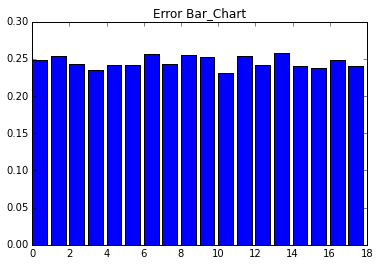

In [32]:
plotErr(errorlist)